# **Predict Customer Personality to Boost Marketing Campaign by Using K-Means**

## 1. Import Library

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Import Dataset

In [4]:
df = pd.read_csv('marketing_campaign_data.csv', error_bad_lines=False, warn_bad_lines=True)
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.tail(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,2239,9405,1954,S3,Menikah,52869000.0,1,1,15-10-2012,40,84000,3000,61000,2000,1000,21000,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## 3. Data Preprocessing

### 3.1 Handling Duplicated Data

In [8]:
# Check for duplicate data
df.duplicated().sum()

0

In the dataset there is no duplicate data.

### 3.2 Handling Missing Value

In [9]:
# Check for missing values
def check_null(df) :
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = round((col_na/len(df))*100,3)
    missing_data = pd.concat([col_na, percent],axis=1, keys=['Total Missing Values','Percentage(%)'])
    print(missing_data[missing_data['Total Missing Values'] > 0])
    
check_null(df) 

        Total Missing Values  Percentage(%)
Income                    24          1.071


In the dataset there are missing values ​​of 1.071%. This percentage is classified as very small so that when handling it, data that has missing values ​​can be deleted.

In [10]:
df.dropna(inplace=True)
check_null(df) 

Empty DataFrame
Columns: [Total Missing Values, Percentage(%)]
Index: []


In the dataset there is no missing value again.

### 3.3 Changing the Appropriate Data Type

In [11]:
list_item = []
for col in df.columns :
    list_item.append([col, df[col].dtype, df[col].nunique(), df[col].unique()[:5]])
data_type_df = pd.DataFrame(data=list_item, columns = 'Feature DataType UniqueNum UniqueSample'.split())
data_type_df

,Feature,DataType,UniqueNum,UniqueSample
0,Unnamed: 0,int64,2216,"[0, 1, 2, 3, 4]"
1,ID,int64,2216,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,3,"[0, 1, 2]"
7,Teenhome,int64,3,"[0, 1, 2]"
8,Dt_Customer,object,662,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,100,"[58, 38, 26, 94, 16]"


The Dt_Customer column contains date data which should have a datetime data type instead of an object . Therefore, this column needs to be adjusted.

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

The Dt_Customer column is of datetime data type.

### 3.4 Feature Engineering

#### 3.4.1 Feature TotalDaysJoined

In [13]:
df['TotalDaysJoined'] = datetime.now() - df['Dt_Customer']
df['TotalDaysJoined'] = df['TotalDaysJoined'].dt.days

#### 3.4.2 Feature Age

In [14]:
df['Age'] = datetime.now().year - df['Year_Birth']

#### 3.4.3 Feature AgeGroup

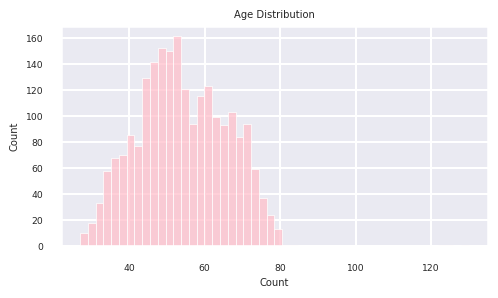

In [15]:
sns.set_context("talk", font_scale=0.4)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(5,3))
    sns.histplot(data = df, x = 'Age', color = 'pink', bins= 50)
    ax.set_title('Age Distribution')
    plt.xlabel('Count')

plt.tight_layout()

In [16]:
ag = []

for i in df['Age']:
    if i < 12 :
        grup = 'Child'
    elif i < 25 :
        grup = 'Teen'
    elif i < 45 :
        grup = 'Adult'
    elif i < 65 :
        grup = 'Senior Adult'
    else:
        grup = 'Old'
    ag.append(grup)

df['AgeGroup'] = ag

#### 3.4.4 Feature TotalChildren

In [17]:
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

#### 3.4.5 Feature TotalAmountSpent

In [18]:
df['TotalAmountSpent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + \
                         df['MntSweetProducts'] + df['MntGoldProds']

#### 3.4.6 Feature TotalPurchases

In [19]:
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

#### 3.4.7 Feature TotalAccepted

In [20]:
df['TotalAccepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#### 3.4.8 Fetaure ConversionRate

In [21]:
def div(x,y):
    if y == 0:
        return 0
    return x / y

df['ConversionRate'] = df.apply(lambda x : div(x['TotalPurchases'], x['NumWebVisitsMonth']), axis=1)

### 3.5 Feature Encoding

### 3.5.1 Feature Education

In [22]:
df['Education'].value_counts()

S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64

In [23]:
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education'] = df['Education'].map(mapping_education)

### 3.5.2 Feature Marital_Status

In [24]:
df['Marital_Status'].value_counts()

Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64

In [25]:
maping_marital_status = {
    'Lajang' : 0,
    'Bertunangan' : 1,
    'Menikah' : 1,
    'Cerai' : 0,
    'Janda' : 0,
    'Duda' : 0
}

df['Have_a_Partner'] = df['Marital_Status'].map(maping_marital_status)

### 3.5.3 Feature AgeGroup

In [26]:
df['AgeGroup'].value_counts()

Senior Adult    1232
Old              512
Adult            472
Name: AgeGroup, dtype: int64

In [27]:
maping_age_group = {
    'Adult' : 0,
    'Old' : 1,
    'Senior Adult' : 2
}

df['AgeGroup'] = df['AgeGroup'].map(maping_age_group)

In [28]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalDaysJoined,Age,AgeGroup,TotalChildren,TotalAmountSpent,TotalPurchases,TotalAccepted,ConversionRate,Have_a_Partner
0,0,5524,1957,2,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4169,66,1,0,1617000,25,0,3.571429,0
1,1,2174,1954,2,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3323,69,1,2,27000,6,0,1.200000,0
2,2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,3670,58,2,0,776000,21,0,5.250000,1
3,3,6182,1984,2,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3263,39,0,1,53000,8,0,1.333333,1
4,4,5324,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3519,42,0,1,422000,19,0,3.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,2,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,3739,56,2,1,1341000,18,0,3.600000,1
2236,2236,4001,1946,4,Bertunangan,64014000.0,2,1,2014-10-06,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3259,77,1,3,444000,22,1,3.142857,1
2237,2237,7270,1981,2,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,3513,42,0,0,1241000,19,1,3.166667,0
2238,2238,8235,1956,3,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,3514,67,1,1,843000,23,0,7.666667,1


## 4. Exploratory Data Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2216 non-null   int64         
 1   ID                   2216 non-null   int64         
 2   Year_Birth           2216 non-null   int64         
 3   Education            2216 non-null   int64         
 4   Marital_Status       2216 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          2216 non-null   datetime64[ns]
 9   Recency              2216 non-null   int64         
 10  MntCoke              2216 non-null   int64         
 11  MntFruits            2216 non-null   int64         
 12  MntMeatProducts      2216 non-null   int64         
 13  MntFishProducts      2216 non-nul

In [30]:
numerical_cols = ['Income', 'Recency','NumWebVisitsMonth','TotalDaysJoined','Age','TotalChildren',
                  'TotalAmountSpent','TotalPurchases','TotalAccepted','ConversionRate']

categorical_cols = ['Education', 'Marital_Status','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 
                    'AcceptedCmp5', 'Complain','Response', 'AgeGroup']

### 4.1 Univariate Analysis

In [31]:
    round(df[numerical_cols].describe(),2)

,Income,Recency,NumWebVisitsMonth,TotalDaysJoined,Age,TotalChildren,TotalAmountSpent,TotalPurchases,TotalAccepted,ConversionRate
count,2.216000e+03,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,5.224725e+07,49.01,5.32,3710.01,54.18,0.95,607075.36,14.88,0.30,4.39
std,2.517308e+07,28.95,2.43,232.47,11.99,0.75,602900.48,7.67,0.68,4.89
min,1.730000e+06,0.00,0.00,3198.00,27.00,0.00,5000.00,0.00,0.00,0.00
25%,3.530300e+07,24.00,3.00,3538.00,46.00,0.00,69000.00,8.00,0.00,1.22
50%,5.138150e+07,49.00,6.00,3711.00,53.00,1.00,396500.00,15.00,0.00,2.61
75%,6.852200e+07,74.00,7.00,3884.00,64.00,1.00,1048000.00,21.00,0.00,5.40
max,6.666660e+08,99.00,20.00,4261.00,130.00,3.00,2525000.00,44.00,4.00,43.00


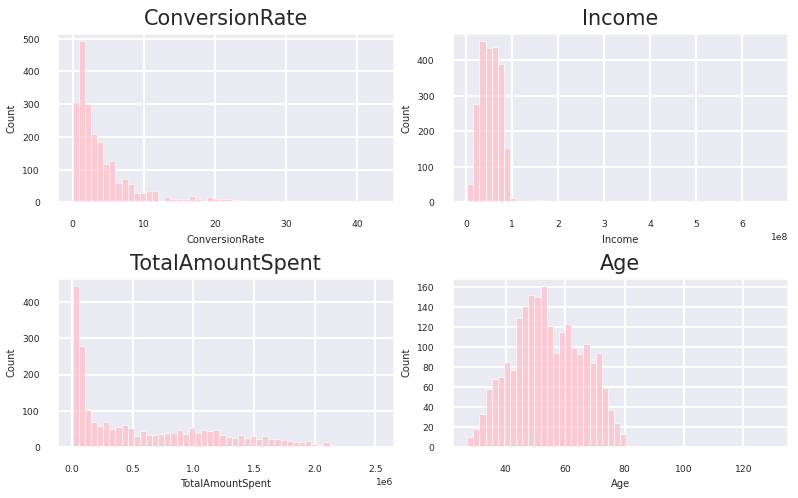

In [32]:
cols = ['ConversionRate', 'Income', 'TotalAmountSpent', 'Age']

plt.figure(figsize=(8, 5))
sns.set_context("talk", font_scale=0.4)
with sns.axes_style("darkgrid"):
    for i, col in enumerate(cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data=df, x=col, color='pink', bins=50)
        plt.title(f'{col}', fontsize=15)
        plt.tight_layout()

plt.show()

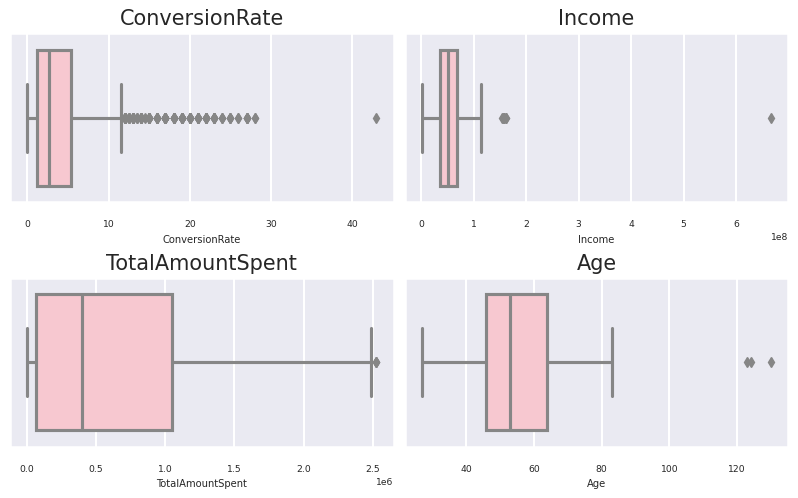

In [33]:
plt.figure(figsize=(8, 5))
sns.set_context("talk", font_scale=0.4)
with sns.axes_style("darkgrid"):
    for i, col in enumerate(cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, x=col, color='pink')
        plt.title(f'{col}', fontsize=15)
        plt.tight_layout()

plt.show()

### 4.2 Bivariate Analysis

In [34]:
cols = ['Income','TotalAmountSpent','Age']

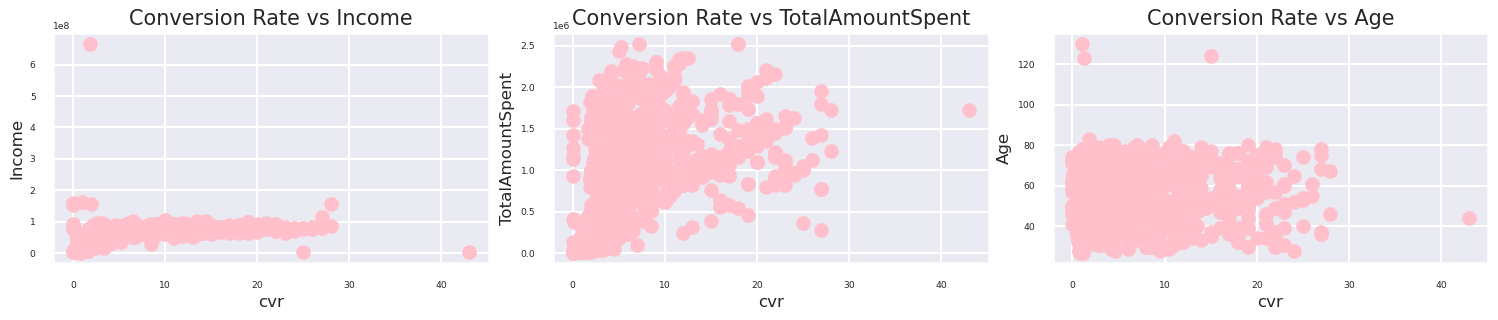

In [35]:
plt.figure(figsize=(15, 20))
sns.set_context("talk", font_scale=0.4)
with sns.axes_style("darkgrid"):
    for i, col in enumerate (df[cols], 1):
        plt.subplot(7,3,i)
        plt.scatter(df['ConversionRate'], df[col], c='pink')
        plt.ylabel(f'{col}', fontsize = 12)
        plt.xlabel('cvr', fontsize = 12)
        plt.title(f'Conversion Rate vs {col}', fontsize=15)
        plt.tight_layout()

### 4.3 Multivariate Analysis

In [36]:
df_heatmap = df[['Income','Recency','TotalAmountSpent','TotalPurchases','NumWebVisitsMonth','TotalAccepted','Age',
                 'AgeGroup','TotalChildren','ConversionRate','TotalDaysJoined']]

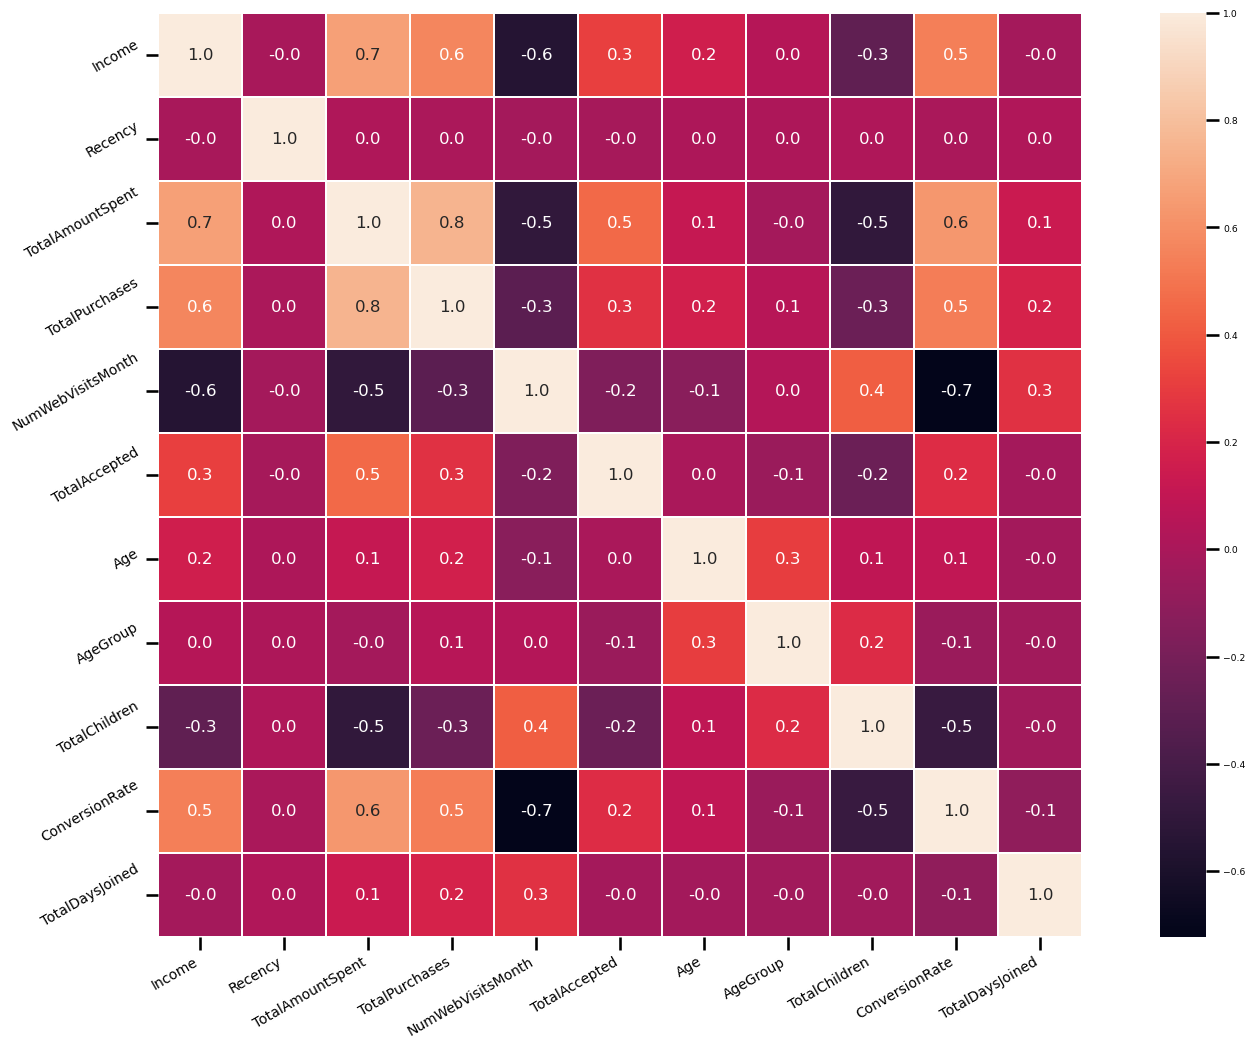

In [37]:
plt.figure(figsize=(20, 12))
corrmat = df_heatmap.corr()
sns.heatmap(corrmat, annot=True, fmt='.1f', vmin=corrmat.values.min(), vmax=1, square=True,
            linewidths=0.1, annot_kws={"fontsize":12})
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 10)
plt.yticks(rotation = 30, fontsize = 10)
plt.show()

## 5. Modelling

In [38]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalDaysJoined,Age,AgeGroup,TotalChildren,TotalAmountSpent,TotalPurchases,TotalAccepted,ConversionRate,Have_a_Partner
0,0,5524,1957,2,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4169,66,1,0,1617000,25,0,3.571429,0
1,1,2174,1954,2,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3323,69,1,2,27000,6,0,1.200000,0
2,2,4141,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,3670,58,2,0,776000,21,0,5.250000,1
3,3,6182,1984,2,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3263,39,0,1,53000,8,0,1.333333,1
4,4,5324,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3519,42,0,1,422000,19,0,3.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,2,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,3739,56,2,1,1341000,18,0,3.600000,1
2236,2236,4001,1946,4,Bertunangan,64014000.0,2,1,2014-10-06,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3259,77,1,3,444000,22,1,3.142857,1
2237,2237,7270,1981,2,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,3513,42,0,0,1241000,19,1,3.166667,0
2238,2238,8235,1956,3,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,3514,67,1,1,843000,23,0,7.666667,1


In [39]:
df.drop(columns = ['Unnamed: 0','ID','Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer','MntCoke','MntFruits',
                   'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
                   'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                   'AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue','Age'], inplace=True)
df

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,TotalDaysJoined,AgeGroup,TotalChildren,TotalAmountSpent,TotalPurchases,TotalAccepted,ConversionRate,Have_a_Partner
0,2,58138000.0,58,7,0,1,4169,1,0,1617000,25,0,3.571429,0
1,2,46344000.0,38,5,0,0,3323,1,2,27000,6,0,1.200000,0
2,2,71613000.0,26,4,0,0,3670,2,0,776000,21,0,5.250000,1
3,2,26646000.0,26,6,0,0,3263,0,1,53000,8,0,1.333333,1
4,4,58293000.0,94,5,0,0,3519,0,1,422000,19,0,3.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223000.0,46,5,0,0,3739,2,1,1341000,18,0,3.600000,1
2236,4,64014000.0,56,7,0,0,3259,1,3,444000,22,1,3.142857,1
2237,2,56981000.0,91,6,0,0,3513,0,0,1241000,19,1,3.166667,0
2238,3,69245000.0,8,3,0,0,3514,1,1,843000,23,0,7.666667,1


In [40]:
df_scaled = df.copy()
ss = StandardScaler()

df_scaled = ss.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
round(df_scaled,2)

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,TotalDaysJoined,AgeGroup,TotalChildren,TotalAmountSpent,TotalPurchases,TotalAccepted,ConversionRate,Have_a_Partner
0,-0.46,0.23,0.31,0.69,-0.1,2.38,1.97,-0.42,-1.26,1.68,1.32,-0.44,-0.17,-1.35
1,-0.46,-0.23,-0.38,-0.13,-0.1,-0.42,-1.67,-0.42,1.41,-0.96,-1.16,-0.44,-0.65,-1.35
2,-0.46,0.77,-0.80,-0.54,-0.1,-0.42,-0.17,0.81,-1.26,0.28,0.80,-0.44,0.18,0.74
3,-0.46,-1.02,-0.80,0.28,-0.1,-0.42,-1.92,-1.66,0.07,-0.92,-0.90,-0.44,-0.63,0.74
4,1.53,0.24,1.55,-0.13,-0.1,-0.42,-0.82,-1.66,0.07,-0.31,0.54,-0.44,-0.12,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.46,0.36,-0.10,-0.13,-0.1,-0.42,0.12,0.81,0.07,1.22,0.41,-0.44,-0.16,0.74
2212,1.53,0.47,0.24,0.69,-0.1,-0.42,-1.94,-0.42,2.74,-0.27,0.93,1.03,-0.26,0.74
2213,-0.46,0.19,1.45,0.28,-0.1,-0.42,-0.85,-1.66,-1.26,1.05,0.54,1.03,-0.25,-1.35
2214,0.54,0.68,-1.42,-0.96,-0.1,-0.42,-0.84,-0.42,0.07,0.39,1.06,-0.44,0.67,0.74


### 5.1 K-Means Clustering

In [41]:
inertia = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=142)
    kmeans.fit(df_scaled.values)
    inertia.append(kmeans.inertia_)

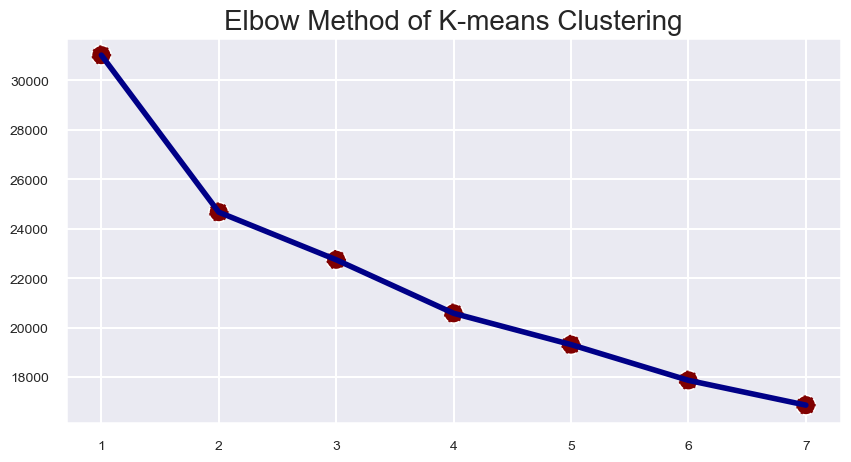

In [42]:
plt.figure(figsize=(10, 5))
sns.set_context("talk", font_scale=0.4)
with sns.axes_style("darkgrid"):
    plt.title('Elbow Method of K-means Clustering', fontsize = 20)
    sns.lineplot(x=range(1, 8), y=inertia, color='#000087', linewidth = 4)
    sns.scatterplot(x=range(1, 8), y=inertia, s=200, color='#800000',  linestyle='--')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

In [43]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=142)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

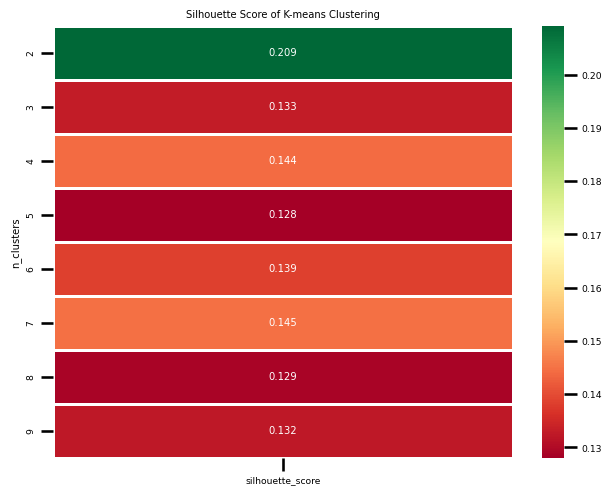

In [44]:
visualize_silhouette_layer(df_scaled)

In [45]:
kmeans = KMeans(n_clusters=2, random_state=142)
kmeans.fit(df_scaled.values)
df_scaled['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

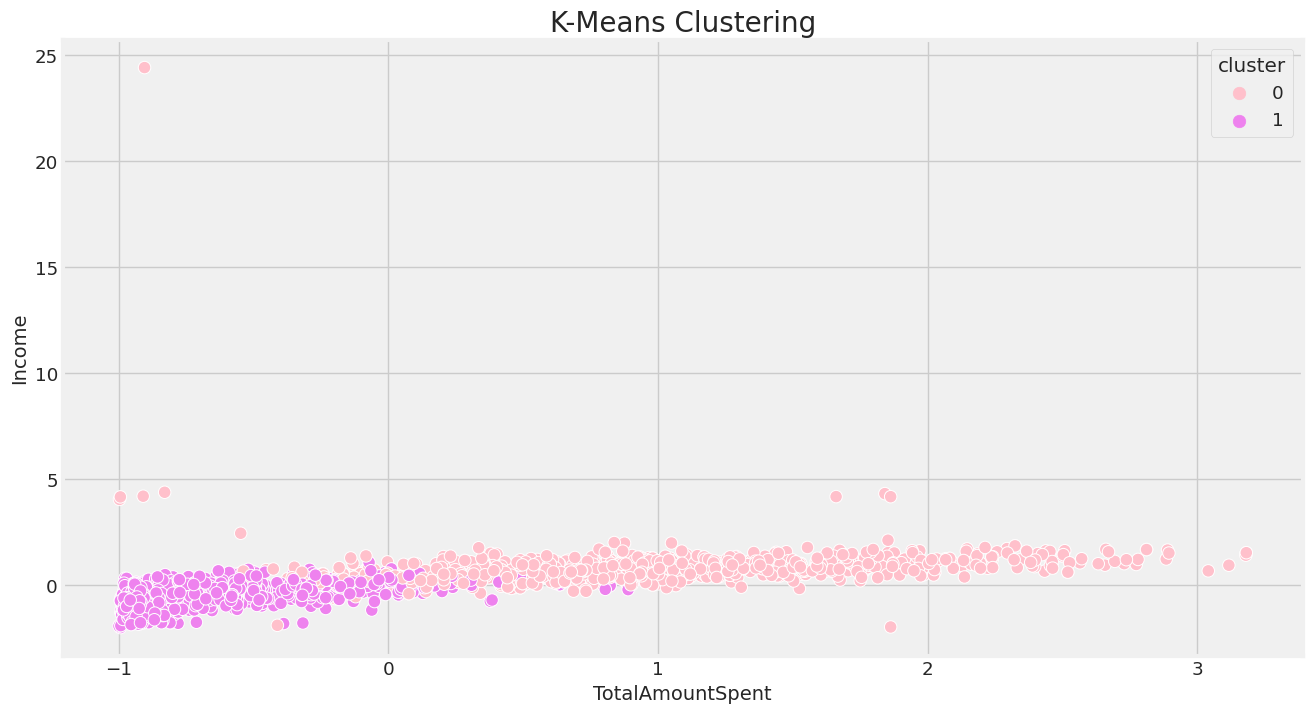

In [46]:
plt.figure(figsize=(16, 8))  
sns.set_context("talk", font_scale=0.8) 
with sns.axes_style("darkgrid"):
    plt.style.use("fivethirtyeight")
    sns.scatterplot(data=df_scaled, x='TotalAmountSpent', y='Income', hue='cluster', palette = ['pink','violet'])
    plt.title('K-Means Clustering', fontsize = 20)

plt.show()

## 6. Clustering Analysis and Interpretation

In [48]:
df.groupby('cluster')['Income','TotalAmountSpent','TotalPurchases','TotalAccepted','ConversionRate'].describe()

AgeGroup                                               Income  \
           count      mean       std  min  25%  50%  75%  max   count   
cluster                                                                 
0          910.0  1.339560  0.767947  0.0  1.0  2.0  2.0  2.0   910.0   
1         1306.0  1.345329  0.833796  0.0  1.0  2.0  2.0  2.0  1306.0   

                                                                        \
                 mean           std        min         25%         50%   
cluster                                                                  
0        7.264169e+07  2.398259e+07  2447000.0  63894000.0  71367000.0   
1        3.803673e+07  1.352034e+07  1730000.0  28338750.0  37894000.0   

                                 TotalAmountSpent                \
                75%          max            count          mean   
cluster                                                           
0        79674750.0  666666000.0            910.0  1.212949e+06   
1        47733000.0   79146000.0           1306.0  1.849119e+05   

                                                                           \
                   std     min       25%        50%        75%        max   
cluster                                                                     
0        450439.330433  6000.0  893250.0  1163000.0  1527500.0  2525000.0   
1        203215.976824  5000.0   45000.0    89000.0   271750.0  1171000.0   

        TotalPurchases                                                    \
                 count       mean       std  min   25%   50%   75%   max   
cluster                                                                    
0                910.0  21.565934  4.944304  0.0  18.0  21.0  25.0  44.0   
1               1306.0  10.222818  5.474578  0.0   6.0   9.0  14.0  32.0   

        TotalAccepted                                               \
                count      mean       std  min  25%  50%  75%  max   
cluster                                                              
0               910.0  0.579121  0.920254  0.0  0.0  0.0  1.0  4.0   
1              1306.0  0.102603  0.315926  0.0  0.0  0.0  0.0  2.0   

        ConversionRate                                                      
                 count      mean       std  min  25%  50%        75%   max  
cluster                                                                     
0                910.0  8.233741  5.616824  0.0  4.4  6.4  10.375000  43.0  
1               1306.0  1.713023  1.057055  0.0  1.0  1.4   2.333333   8.5

In [49]:
map_cluster = {
    0 : 'High Spender',
    1 : 'Low Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

(array([0, 1]), [Text(0, 0, 'High Spender'), Text(1, 0, 'Low Spender')])

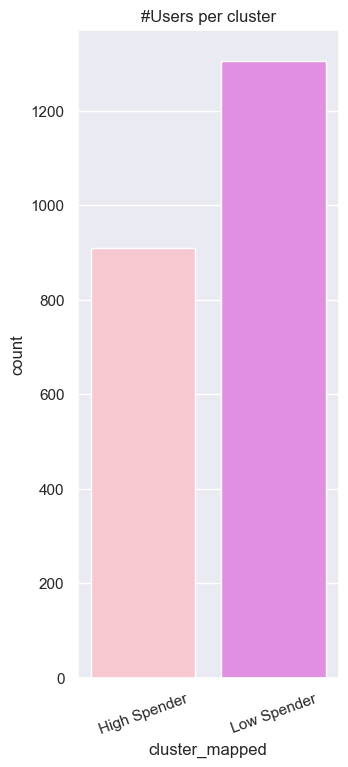

In [50]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df['cluster_mapped'], palette = ['pink','violet'])
plt.title('#Users per cluster')
plt.xticks(rotation=20)

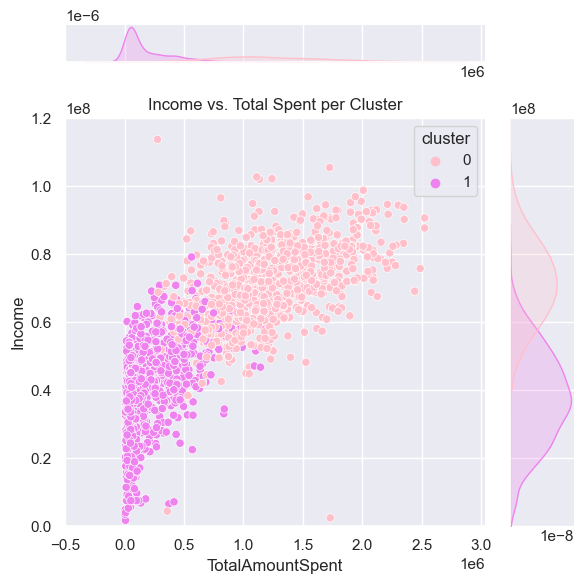

In [51]:
plot = sns.jointplot(x=df["TotalAmountSpent"], y=df["Income"], hue=df["cluster"], palette = ['pink','violet'])
plt.title('Income vs. Total Spent per Cluster')
plot.ax_marg_y.set_ylim(0, 120000000)
plt.tight_layout()

In [71]:
df.head()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,TotalDaysJoined,AgeGroup,TotalChildren,TotalAmountSpent,TotalPurchases,TotalAccepted,ConversionRate,Have_a_Partner,cluster,cluster_mapped
0,2,58138000.0,58,7,0,1,4169,1,0,1617000,25,0,3.571429,0,0,High Spender
1,2,46344000.0,38,5,0,0,3323,1,2,27000,6,0,1.200000,0,1,Low Spender
2,2,71613000.0,26,4,0,0,3670,2,0,776000,21,0,5.250000,1,0,High Spender
3,2,26646000.0,26,6,0,0,3263,0,1,53000,8,0,1.333333,1,1,Low Spender
4,4,58293000.0,94,5,0,0,3519,0,1,422000,19,0,3.800000,1,1,Low Spender


### 6.1 Age Group Per  Cluster

In [64]:
df.groupby('cluster_mapped')['AgeGroup'].value_counts()

cluster_mapped  AgeGroup
High Spender    2           475
                1           269
                0           166
Low Spender     2           757
                0           306
                1           243
Name: AgeGroup, dtype: int64

In [73]:
df.groupby('cluster_mapped')['Have_a_Partner'].value_counts()

cluster_mapped  Have_a_Partner
High Spender    1                 579
                0                 331
Low Spender     1                 851
                0                 455
Name: Have_a_Partner, dtype: int64

In [77]:
df.groupby('cluster_mapped')['TotalChildren'].value_counts()

cluster_mapped  TotalChildren
High Spender    0                491
                1                379
                2                 35
                3                  5
Low Spender     1                738
                2                381
                0                142
                3                 45
Name: TotalChildren, dtype: int64

In [79]:
df.groupby('cluster_mapped')['Complain'].value_counts()

cluster_mapped  Complain
High Spender    0            904
                1              6
Low Spender     0           1291
                1             15
Name: Complain, dtype: int64

In [80]:
df.groupby('cluster_mapped')['Response'].value_counts()

cluster_mapped  Response
High Spender    0            699
                1            211
Low Spender     0           1184
                1            122
Name: Response, dtype: int64

In [78]:
df.groupby('cluster_mapped')['AgeGroup','Have_a_Partner','TotalChildren'].value_counts()

cluster_mapped  AgeGroup  Have_a_Partner  TotalChildren
High Spender    2         1               1                165
                                          0                127
                1         1               0                 93
                2         0               1                 83
                0         1               0                 74
                2         0               0                 74
                1         1               1                 68
                0         0               0                 62
                1         0               0                 61
                                          1                 35
                0         1               1                 22
                2         1               2                 16
                1         1               2                  8
                2         0               2                  8
                0         0               1                  6

### 6.2 Total Income Per Cluster

(0.0, 120000000.0)

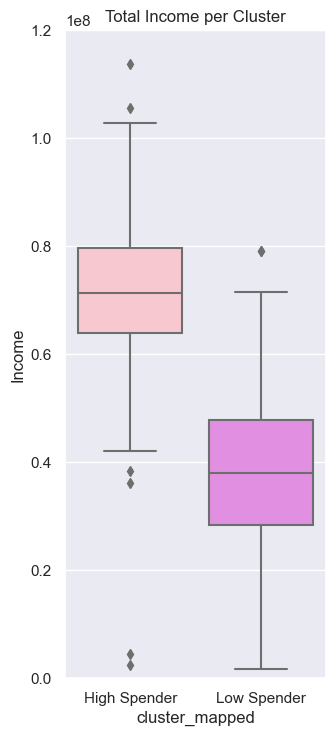

In [52]:
sns.boxplot(x=df['cluster_mapped'], y=df['Income'], palette = ['pink','violet'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

### 6.3 Total Amount Spent Per Cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

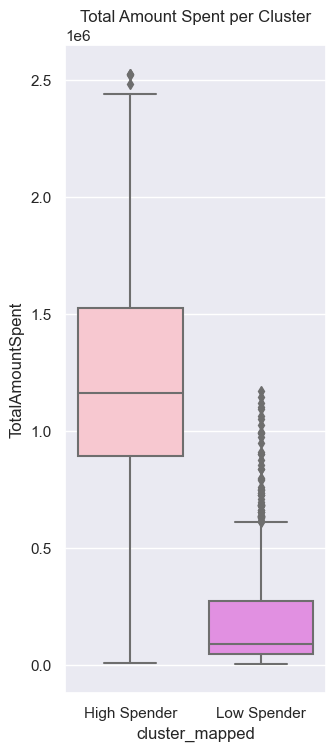

In [53]:
sns.boxplot(x=df['cluster_mapped'], y=df['TotalAmountSpent'], palette = ['pink','violet'])
plt.title('Total Amount Spent per Cluster')

### 6.4 Total Visit Per Cluster

Text(0.5, 1.0, 'Total Visit Web per Cluster')

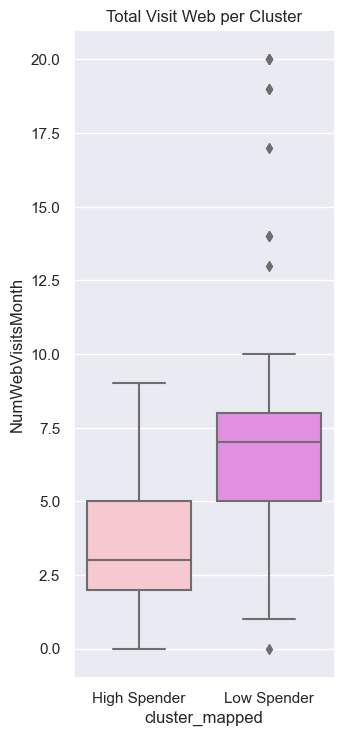

In [54]:
sns.boxplot(x=df['cluster_mapped'], y=df['NumWebVisitsMonth'], palette = ['pink','violet'])
plt.title('Total Visit Web per Cluster')

### 6.5 Conversion Rate Per Cluster

Text(0.5, 1.0, 'CVR per Cluster')

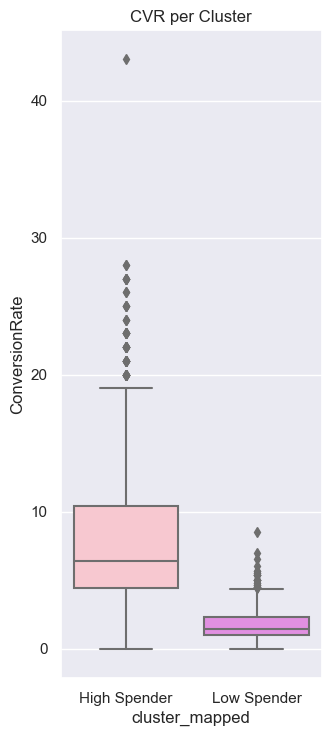

In [55]:
sns.boxplot(x=df['cluster_mapped'], y=df['ConversionRate'], palette = ['pink','violet'])
plt.title('CVR per Cluster')

## 7. Insight and Recommendations

### 7.1 Insight

#### 1. High Spender
This group is dominated by customers aged 45-65 who are married and do not have children. In terms of income and total expenditure, this cluster has high income and total expenditure, around 72 million per year for revenue and 1.2 million per year for total expenditure. Customers in this cluster respond most to company campaigns and complain less frequently. Even though they don't visit the website often, their conversion rate is high.

#### 2. Low Spender
This group is dominated by customers aged 45-65 who are married and have one child. In terms of income and total expenditure, this cluster has low income and total expenditure, around 13.5 million per year for income and 185 thousand per year for total expenditure. Customers in this cluster make the most complaints and respond the least to company campaigns. This cluster visits websites more frequently than the High Spenders cluster, but their conversion rates are low.


### 7.2 Recommendations

#### 1. Targeting High Spender Customers
Companies can offer special promotions, exclusive products, or incentives to attract High Spender customers. Strive to satisfy High Spender customers with superior service, responsive customer support, and a customized experience. They are a significant source of income.
#### 2. Increasing Low Spender Customer Engagement
Identify the preferences and needs of Low Spender customers, offer promotions that are better suited to their budgets, and create more attractive campaigns for Low Spender customers to increase their engagement. Campaigns with discounts, reward points, or loyalty programs can help.
#### 3. Fixed Low Spender Conversion Rate
Conduct surveys or deeper analysis to understand why Low Spender customers have low conversion rates. It can help in adjusting marketing and product strategies. Offer more relevant product recommendations based on the purchase history of Low Spender customers. It may encourage them to make additional purchases.
#### 4. Website Analysis and Complaints
Companies can improve the user experience on their websites, including better navigation, more informative content, and more engaging features to increase visits and conversions. For handling complaints, customer complaints can be researched and handled quickly and effectively. Customers who are satisfied with handling their complaints are more likely to remain loyal.
#### 5. Personalization and Segmentation
Use customer data to personalize communications and offers. Customers tend to respond better if they feel personally cared for. When customers feel personally cared for, they are more likely to interact with the company, feel valued, and even increase their satisfaction. It can positively impact customer retention, conversion, and customer loyalty to a company's brand or product.

# Thanks!